# Практическое задание № 4

Этапы выполнения: 

- **Шаг 1.** Импортировать библиотеки, загрузить содержимое файла, переименовать признаки:

https://raw.githubusercontent.com/OlesiaAngel/DataAnalitics/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/visualization/anketa_pr4.csv
- **Шаг 2.** Выполнить токенизацию (используйте признаки про фильмы, ожидание от курса, виды спорта)
- **Шаг 3.** Выполнить лемматизацию и удалить стоп-слова и знаки препинания (для признаков из шага 2)
- **Шаг 4.** Выполнить подсчёт количества вхождений слов (для признаков из шага 2)
- **Шаг 5.** Построить гистограмму по популярным видам спорта (20 видов), treepmap по фильмам (20 слов), облако слов из топ 50 слов по признаку ожидание от курса.  
- **Шаг 6.** Опубликовать файл расширения ipynb на платформу Odin.

In [1]:
!pip install wordcloud

conda install -c conda-forge wordcloud # запускается в терминале

In [2]:
!pip install pymorphy2

In [3]:
!pip install collection

In [4]:
import re
import string
import nltk # библиотека nltk
from nltk.tokenize import word_tokenize # готовые токенизаторы библиотеки nltk
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(13, 10))

import pandas as pd
import numpy as np
from PIL import Image
import datetime as dt 

import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots

from pymorphy2 import MorphAnalyzer

from collections import Counter
from wordcloud import WordCloud

import warnings
warnings.simplefilter("ignore")

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/OlesiaAngel/DataAnalitics/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/visualization/anketa_pr4.csv', 
                sep=';')
df

id     Отметка времени Какая у Вас операционная система на ПК?  \
0      1  7.27.2022 18:20:10                                     Win   
1      2  7.28.2022 23:23:42                                     Win   
2      3  7.27.2022 17:13:20                                     Win   
3      4  7.27.2022 17:16:58                                   MacOS   
4      5   7.30.2022 1:46:14                                   MacOS   
..   ...                 ...                                     ...   
125  126   8.13.2022 2:02:14                                     Win   
126  127  8.13.2022 16:42:28                                     Win   
127  128   8.14.2022 4:09:55                                     Win   
128  129  8.15.2022 11:36:19                                     Win   
129  130  8.15.2022 21:32:18                                     Win   

           С какими языками программирования знакомы?   \
0                       с программированием не знакома   
1                                               Delphi   
2    Python, Pascal / VB / Кумир / алгоритмический ...   
3           Pascal / VB / Кумир / алгоритмический язык   
4                                               Python   
..                                                 ...   
125         Я не знаю ни одного языка программирования   
126         Я не знаю ни одного языка программирования   
127  Я не знаю ни одного языка программирования, из...   
128                                 C / C++ / C#, Java   
129  Python, Я не знаю ни одного языка программиров...   

               Какой Ваш любимый вид спорта?  \
0               бег с препятствиями по жизни   
1                                    Биатлон   
2                                    шахматы   
3                                    биатлон   
4                                  бадминтон   
..                                       ...   
125  Тренажеры, кардио - занимаюсь регулярно   
126                          Легкая атлетика   
127                                 Волейбол   
128                                   Теннис   
129                                    cs:go   

                            Посоветуйте хорошие фильмы  \
0    "Гордость и предубеждение",  "Лунные влюблённы...   
1    Английский пациент. Облачный атлас. Призрачная...   
2    "Начало" Нолана, "Меланхолия" Л. фон Триера, "...   
3                                                  1+1   
4                                            5 элемент   
..                                                 ...   
125                                      Up in the Air   
126                                   Затерянный город   
127  "Сноуден" 2016 г., "Влюблённый богач" 2020 г.,...   
128                               Форд против Феррари    
129                                       человек-слон   

                             Что Вы ожидаете от курса? Из какого Вы города?  
0    Научиться интересной профессии с возможностью ...          Севастополь  
1               Удовольствие от получения новых знаний               Москва  
2    Ожидаю, что выучусь на аналитика данных и полу...           Георгиевск  
3                                         новых знаний      Санкт-Петербург  
4                                               знаний       Ростов-на-Дону  
..                                                 ...                  ...  
125  Ознакомление с навыками анализа данных, примен...      Санкт-Петербург  
126                  Получение знаний, трудоустройство              Татарск  
127  Хочу научиться работать с большим объемом данн...                Анапа  
128                      Практических навыков и знаний           Ульяновск   
129                                             умений              Воронеж  

[130 rows x 8 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   id                                           130 non-null    int64 
 1   Отметка времени                              130 non-null    object
 2   Какая у Вас операционная система на ПК?      130 non-null    object
 3   С какими языками программирования знакомы?   130 non-null    object
 4   Какой Ваш любимый вид спорта?                130 non-null    object
 5   Посоветуйте хорошие фильмы                   130 non-null    object
 6   Что Вы ожидаете от курса?                    130 non-null    object
 7   Из какого Вы города?                         130 non-null    object
dtypes: int64(1), object(7)
memory usage: 8.2+ KB


In [7]:
df.shape

(130, 8)

In [8]:
rename_dic = dict(zip(df.columns, 
                      ['id','time', 'os', 'info', 'sport',
                       'movie', 'goal', 'city']))

In [9]:
df.rename(columns=rename_dic, inplace=True)

In [10]:
df.head(1)

id                time   os                            info  \
0   1  7.27.2022 18:20:10  Win  с программированием не знакома   

                          sport  \
0  бег с препятствиями по жизни   

                                               movie  \
0  "Гордость и предубеждение",  "Лунные влюблённы...   

                                                goal         city  
0  Научиться интересной профессии с возможностью ...  Севастополь

Начнем считать токенизацию по спорту
Построим гистограмму

In [11]:
df['sport']=df['sport'].str.lower()

In [12]:
df1 = df.sport.value_counts().reset_index()[:20]
df1

index  sport
0                    плавание     10
1                      футбол      7
2                      ходьба      5
3            фигурное катание      4
4                      борьба      3
5                     шахматы      3
6                    волейбол      3
7                        йога      3
8                    сноуборд      3
9                         нет      3
10                   плаванье      3
11                    биатлон      3
12                     айкидо      2
13                  велоспорт      2
14  художественная гимнастика      2
15                        бег      2
16                  велосипед      2
17                  волейбол       2
18                     теннис      2
19           лёгкая атлетика       2

In [13]:
all_words_sport = np.concatenate(df1['index'].apply(lambda s:s.lower().strip().split()).values) # токенизация
all_words_sport 

array(['плавание', 'футбол', 'ходьба', 'фигурное', 'катание', 'борьба',
       'шахматы', 'волейбол', 'йога', 'сноуборд', 'нет', 'плаванье',
       'биатлон', 'айкидо', 'велоспорт', 'художественная', 'гимнастика',
       'бег', 'велосипед', 'волейбол', 'теннис', 'лёгкая', 'атлетика'],
      dtype='<U14')

In [14]:
pymorphy2_analyzer = MorphAnalyzer() 
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ' #пунктуация
nltk_stopwords = stopwords.words('russian') #стоп-слова
cleaned_tokens_sport = []  
stop_words = ['это', 'который', 'всё', 'весь', '1','лгкай']
for token in all_words_sport:
    token = re.sub(r'[^а-яА-Я ^0-9]', '', str(token)) 
    lemma_words = pymorphy2_analyzer.parse(token) #лемматизация
    token = lemma_words[0].normal_form #лемматизация
    if (token not in nltk_stopwords) & (token not in punct) & (token not in stop_words) :
        cleaned_tokens_sport.append(token) # готовый список токенов без стоп-слов и пунктуации

wordtext = ' '.join(map(str, cleaned_tokens_sport)) # переводим в текст для построения облака слов

cleaned_tokens_sport

['плавание',
 'футбол',
 'ходьба',
 'фигурный',
 'катание',
 'борьба',
 'шахматы',
 'волейбол',
 'йог',
 'сноуборд',
 'плавание',
 'биатлон',
 'айкидо',
 'велоспорт',
 'художественный',
 'гимнастика',
 'бег',
 'велосипед',
 'волейбол',
 'теннис',
 'атлетика']

In [15]:
word_counts1 = Counter()
word_counts1.update(cleaned_tokens_sport)
wc_top20_1 = word_counts1.most_common(20)
df2 = pd.DataFrame(wc_top20_1, columns = ['word', 'count'])
wc_top20_1

[('плавание', 2),
 ('волейбол', 2),
 ('футбол', 1),
 ('ходьба', 1),
 ('фигурный', 1),
 ('катание', 1),
 ('борьба', 1),
 ('шахматы', 1),
 ('йог', 1),
 ('сноуборд', 1),
 ('биатлон', 1),
 ('айкидо', 1),
 ('велоспорт', 1),
 ('художественный', 1),
 ('гимнастика', 1),
 ('бег', 1),
 ('велосипед', 1),
 ('теннис', 1),
 ('атлетика', 1)]

In [16]:
fig1 = px.treemap(df2, path=['word'], values='count', color='word')
fig1.show()

Считаем по фильмам
Строим treemap

In [17]:
df['movie']=df['movie'].str.lower()

In [18]:
df2 = df.movie.value_counts().reset_index()[:20]
df2

index  movie
0                                                 1+1      7
1   "гордость и предубеждение",  "лунные влюблённы...      1
2                                        ход королевы      1
3   дневник памяти, легенда, золото, мотылёк, все ...      1
4                                      черное зеркало      1
5   "побег из шоушенка"(1994), "последняя дуэль" (...      1
6      столетний старик, который вылез в окно и исчез      1
7   властелин колей, пираты карибского моря, зелен...      1
8                                  волк с уолл- стрит      1
9                   война и мир (зарубежного формата)      1
10  начало, области тьмы, как избежать наказания з...      1
11  последний из просмотренных "история одного наз...      1
12  розенкранц и гильденстерн мертвы, подозрительн...      1
13    нулевой пациент, постучись в мою дверь, триггер      1
14                            они сражались за родину      1
15                              зелёная книга, хоббит      1
16                                          платформа      1
17              "стена" с участием группы пинк флойд.      1
18                            по соображениям совести      1
19                                  волк с уолл-стрит      1

In [19]:
all_movie = np.concatenate(df2 ['index'].apply(lambda s: s.lower().strip().split(",")).values) # токенизация
all_movie

array(['1+1', '"гордость и предубеждение"',
       '  "лунные влюблённые - алые сердца: корё"',
       ' агата кристи  детективы', ' пуаро', ' "коломбо"',
       ' "ищите женщину"', ' "криминальный талант"', 'ход королевы',
       'дневник памяти', ' легенда', ' золото', ' мотылёк',
       ' все фильмы тарантино', 'черное зеркало',
       '"побег из шоушенка"(1994)', ' "последняя дуэль" (2021)',
       ' "раздражительность" (2018)',
       ' "как витька чеснок вёз лёху штыря в дом инвалидов" (2017)',
       ' "калина красная" (1973)', ' "12 разгневанных мужчин" (1957)',
       ' "огни большого города" (1931)', 'столетний старик',
       ' который вылез в окно и исчез', 'властелин колей',
       ' пираты карибского моря', ' зеленая миля', ' пианино',
       ' однажды в голливуде', ' человек дождя',
       ' что гложет гилберта гейса', ' алиса в стране чудес',
       ' гордость и предубеждение', ' звезда',
       ' вечное сияние чистого разума и мнооооогое другое',
       'волк с уолл- с

In [20]:
pymorphy2_analyzer = MorphAnalyzer() 
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ' #пунктуация
nltk_stopwords = stopwords.words('russian') #стоп-слова
cleaned_tokens_movie = []  
stop_words = ['это', 'который', 'всё', 'весь']
for token in all_movie:
    token = re.sub(r'[^а-яА-Я ^0-9]', '', str(token)) 
    lemma_words = pymorphy2_analyzer.parse(token) #лемматизация
    token = lemma_words[0].normal_form #лемматизация
    if (token not in nltk_stopwords) & (token not in punct) & (token not in stop_words) :
        cleaned_tokens_movie.append(token) # готовый список токенов без стоп-слов и пунктуации

wordtext = ' '.join(map(str, cleaned_tokens_movie)) # переводим в текст для построения облака слов

cleaned_tokens_movie

['11',
 'гордость и предубеждение',
 '  лунные влюблнные  алые сердца кор',
 ' агата кристи  детектив',
 ' пуарый',
 ' коломбо',
 ' ищите женщина',
 ' криминальный талант',
 'ход королева',
 'дневник память',
 ' легенда',
 ' золото',
 ' мотылк',
 ' все фильмы тарантино',
 'черное зеркать',
 'побег из шоушенка1994',
 ' последняя дуэль 2021',
 ' раздражительность 2018',
 ' как витька чеснок вз лху штыря в дом инвалидов 2017',
 ' калина красная 1973',
 ' 12 разгневанных мужчин 1957',
 ' огни большого города 1931',
 'столетний старик',
 ' который вылез в окно и исчез',
 'властелин коль',
 ' пираты карибского морить',
 ' зеленая миль',
 ' пианино',
 ' однажды в голливуд',
 ' человек дождь',
 ' что гложет гилберта гейс',
 ' алиса в стране чудес',
 ' гордость и предубеждение',
 ' звезда',
 ' вечное сияние чистого разума и мнооооогое другий',
 'волк с уолл стрить',
 'война и мир зарубежного формат',
 'начало',
 ' области тьма',
 ' как избежать наказания за убийство',
 ' молодой пап',
 'последн

In [21]:
word_counts2 = Counter()
word_counts2.update(cleaned_tokens_movie)
wc_top20_2 = word_counts2.most_common(20)
df3 = pd.DataFrame(wc_top20_2, columns = ['word', 'count'])
wc_top20_2

[('11', 1),
 ('гордость и предубеждение', 1),
 ('  лунные влюблнные  алые сердца кор', 1),
 (' агата кристи  детектив', 1),
 (' пуарый', 1),
 (' коломбо', 1),
 (' ищите женщина', 1),
 (' криминальный талант', 1),
 ('ход королева', 1),
 ('дневник память', 1),
 (' легенда', 1),
 (' золото', 1),
 (' мотылк', 1),
 (' все фильмы тарантино', 1),
 ('черное зеркать', 1),
 ('побег из шоушенка1994', 1),
 (' последняя дуэль 2021', 1),
 (' раздражительность 2018', 1),
 (' как витька чеснок вз лху штыря в дом инвалидов 2017', 1),
 (' калина красная 1973', 1)]

In [22]:
fig = px.treemap(df3, path=['word'], values='count', color='word')
fig.show()

Строим по целям
рисуем облако слов

In [258]:
df['goal']=df['goal'].str.lower()

In [259]:
df3 = df.goal.value_counts().reset_index()[:20]
df3

index  goal
0                                        новых знаний     4
1                                              знаний     2
2                                       новых знаний      2
3   научиться интересной профессии с возможностью ...     1
4   получить новую специальность, для последующего...     1
5                        хочу освоить новую профессию     1
6   узнать новую профессию, не связанную никак с м...     1
7   получение знаний, достаточных для работы в дан...     1
8   освоить новую профессию аналитик данных и нача...     1
9   сменить сферу деятельности и найти высокооплач...     1
10  получить новые знания, что работать в данной с...     1
11  получение новых знаний и освоение новой специа...     1
12   научиться автоматизировать анализ больших данных     1
13  хочу изменить жизнь, заниматься любимым делом,...     1
14               возможность сменить род деятельности     1
15  новые возможности, чтобы идти дальше. новые зн...     1
16                            дополнительных знаний.      1
17  возможно поменяю профиль, и смогу трудоустроит...     1
18  новые знания, смена специальности, новая интер...     1
19  надеюсь освоить новую профессию и даже если не...     1

In [261]:
all_goal = np.concatenate(df3 ['index'].apply(lambda s: s.lower().strip().split()).values) # токенизация
all_goal

array(['новых', 'знаний', 'знаний', 'новых', 'знаний', 'научиться',
       'интересной', 'профессии', 'с', 'возможностью', 'применить',
       'знания', 'на', 'практике.', 'затем', 'трудоустроиться', 'и',
       'работать', 'удаленно.', 'получить', 'новую', 'специальность,',
       'для', 'последующего', 'совершенствования', 'в', 'ней.', 'хочу',
       'освоить', 'новую', 'профессию', 'узнать', 'новую', 'профессию,',
       'не', 'связанную', 'никак', 'с', 'моим', 'образованием,', 'и',
       'как', 'следствие', 'найти', 'онлайн', 'работу', 'получение',
       'знаний,', 'достаточных', 'для', 'работы', 'в', 'данном',
       'направлении', 'и,', 'как', 'следствие,', 'для', 'стабильного',
       'дохода', 'от', 'интересной', 'работы', 'освоить', 'новую',
       'профессию', 'аналитик', 'данных', 'и', 'начать', 'работать', 'по',
       'ней', 'сменить', 'сферу', 'деятельности', 'и', 'найти',
       'высокооплачиваемую', 'работу,', 'которая', 'будет', 'нравиться',
       '(педстаж', 'в', '

In [354]:
pymorphy2_analyzer = MorphAnalyzer() 
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ' #пунктуация
nltk_stopwords = stopwords.words('russian') #стоп-слова
cleaned_tokens_goal = [1]  
stop_words = ['это', 'который', 'всё', 'весь','затем']
for token in all_goal:
    token = re.sub(r'[^а-яА-Я ^0-9]', '', str(token)) 
    lemma_words = pymorphy2_analyzer.parse(token) #лемматизация
    token = lemma_words[0].normal_form #лемматизация
    if (token not in nltk_stopwords) & (token not in punct) & (token not in stop_words) :
        cleaned_tokens_goal.append(token) # готовый список токенов без стоп-слов и пунктуации

wordtext = ' '.join(map(str, cleaned_tokens_goal)) # переводим в текст для построения облака слов

cleaned_tokens_goal

[1,
 'новый',
 'знание',
 'знание',
 'новый',
 'знание',
 'научиться',
 'интересный',
 'профессия',
 'возможность',
 'применить',
 'знание',
 'практика',
 'трудоустроиться',
 'работать',
 'удалённый',
 'получить',
 'новый',
 'специальность',
 'последующий',
 'совершенствование',
 'хотеть',
 'освоить',
 'новый',
 'профессия',
 'узнать',
 'новый',
 'профессия',
 'связанный',
 'никак',
 'образование',
 'следствие',
 'найти',
 'онлайн',
 'работа',
 'получение',
 'знание',
 'достаточный',
 'работа',
 'данный',
 'направление',
 'следствие',
 'стабильный',
 'доход',
 'интересный',
 'работа',
 'освоить',
 'новый',
 'профессия',
 'аналитик',
 'данные',
 'начать',
 'работать',
 'сменить',
 'сфера',
 'деятельность',
 'найти',
 'высокооплачиваемый',
 'работа',
 'нравиться',
 'педстаж',
 'вуз',
 '20',
 'год',
 'получить',
 'новый',
 'знание',
 'работать',
 'дать',
 'сфера',
 'получение',
 'новый',
 'знание',
 'освоение',
 'новый',
 'специальность',
 'научиться',
 'автоматизировать',
 'анализ',
 'бо

In [355]:
word_counts3 = Counter()
word_counts3.update(cleaned_tokens_goal)
wc_top20_3 = word_counts3.most_common(20)
df3 = pd.DataFrame(wc_top20_3, columns = ['word', 'count'])
wc_top20_3

[('новый', 15),
 ('знание', 11),
 ('профессия', 5),
 ('работать', 5),
 ('работа', 5),
 ('возможность', 4),
 ('интересный', 3),
 ('специальность', 3),
 ('освоить', 3),
 ('данные', 3),
 ('сфера', 3),
 ('научиться', 2),
 ('применить', 2),
 ('трудоустроиться', 2),
 ('получить', 2),
 ('хотеть', 2),
 ('следствие', 2),
 ('найти', 2),
 ('получение', 2),
 ('аналитик', 2)]

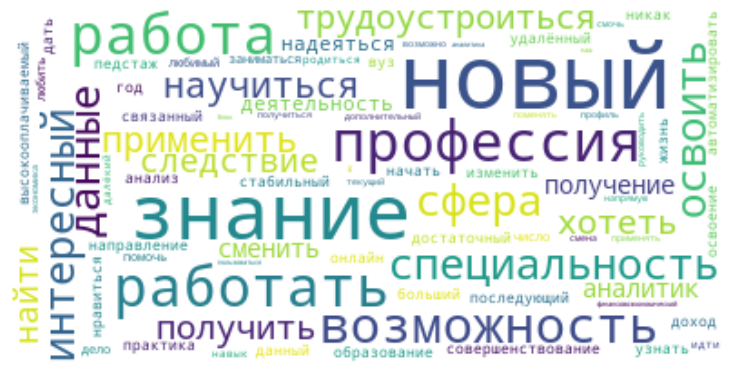

In [356]:
wordcloud = WordCloud(background_color = 'white', # цвет фона
                               max_words = 500, # максимальное количество слов
                               max_font_size = 50, # отображать максимальное значение шрифта
                               random_state = 1, # возвращает цвет PIL для каждого слова
                               margin=5).generate(wordtext)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");